# PROJECT:HR ANALYTICS

In [1]:
#Import the required Libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lets create a dataframe from given csv file
df= pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
#Lets see the first 5 rows of the data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Lets check the shape of the data
df.shape
# There are 34 features and 1 Target(Attrition) and have 1470 rows

(1470, 35)

In [5]:
# Lets check the datatypes
df.dtypes 


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
# Lets get more information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

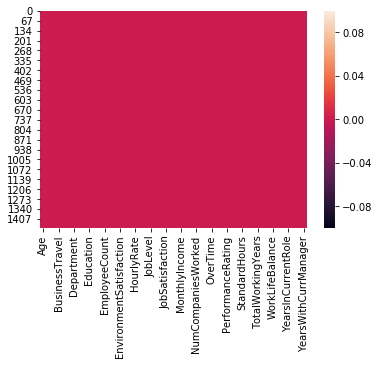

In [7]:
# Lets check the missing values
sns.heatmap(df.isnull())
plt.show()
# Great its showing no missing values

In [8]:
# Lets confirm about missing value once more
df.isnull().sum()
#Hence we are now sure there are no missing values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
# Lets see the descriptive statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
#Lets see the correlation among the different features as well as with target
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


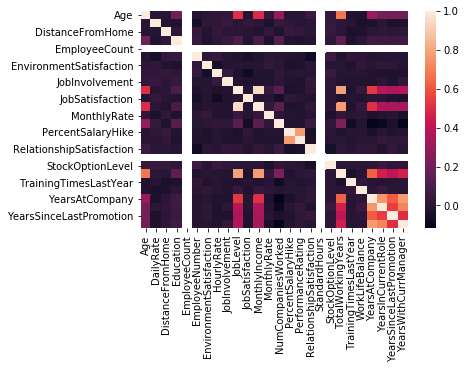

In [11]:
# lets visualize the correlation with heat map
sns.heatmap(df.corr())


In [12]:
# Lets see Attrition distribution
df['Attrition'].value_counts()
# data is imbalanced

No     1233
Yes     237
Name: Attrition, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D64BEE7780>,
      dtype=object)

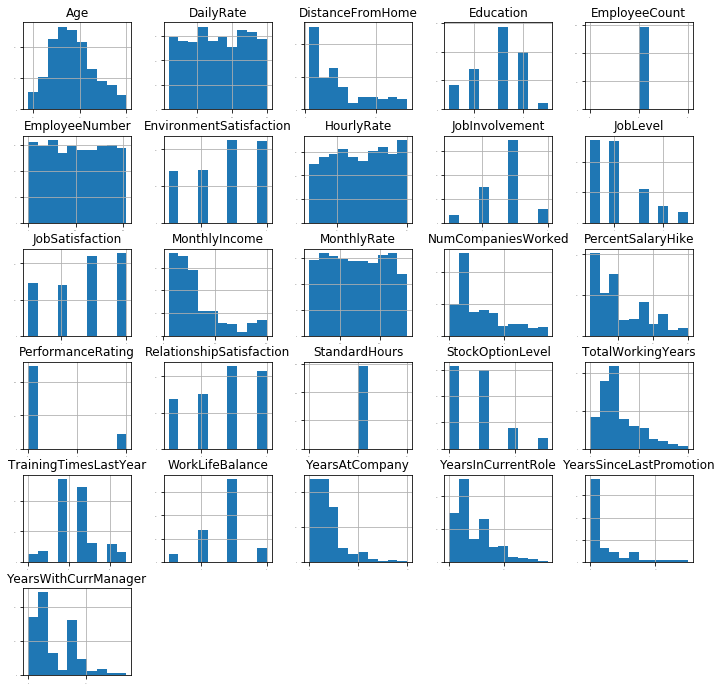

In [13]:
#Lets visualize distribution of numeric data
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,   figsize=(12,12))


Age                            AxesSubplot(0.125,0.772143;0.110714x0.107857)
DailyRate                   AxesSubplot(0.257857,0.772143;0.110714x0.107857)
DistanceFromHome            AxesSubplot(0.390714,0.772143;0.110714x0.107857)
Education                   AxesSubplot(0.523571,0.772143;0.110714x0.107857)
EmployeeCount               AxesSubplot(0.656429,0.772143;0.110714x0.107857)
EmployeeNumber              AxesSubplot(0.789286,0.772143;0.110714x0.107857)
EnvironmentSatisfaction        AxesSubplot(0.125,0.642714;0.110714x0.107857)
HourlyRate                  AxesSubplot(0.257857,0.642714;0.110714x0.107857)
JobInvolvement              AxesSubplot(0.390714,0.642714;0.110714x0.107857)
JobLevel                    AxesSubplot(0.523571,0.642714;0.110714x0.107857)
JobSatisfaction             AxesSubplot(0.656429,0.642714;0.110714x0.107857)
MonthlyIncome               AxesSubplot(0.789286,0.642714;0.110714x0.107857)
MonthlyRate                    AxesSubplot(0.125,0.513286;0.110714x0.107857)

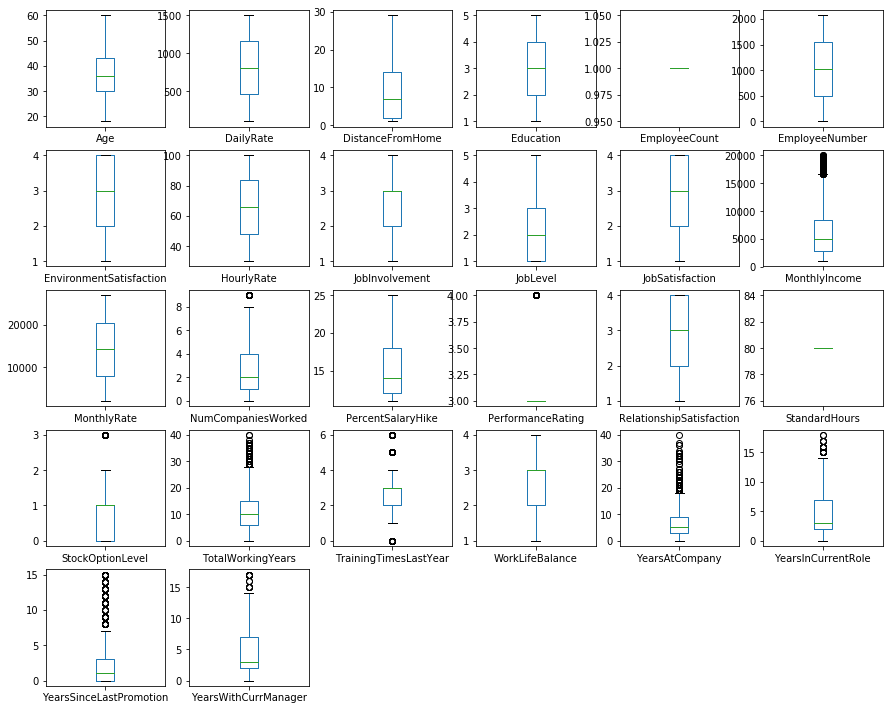

In [14]:
#Lets plot the box plot of each numeric variable
df.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False, figsize=(15,15))


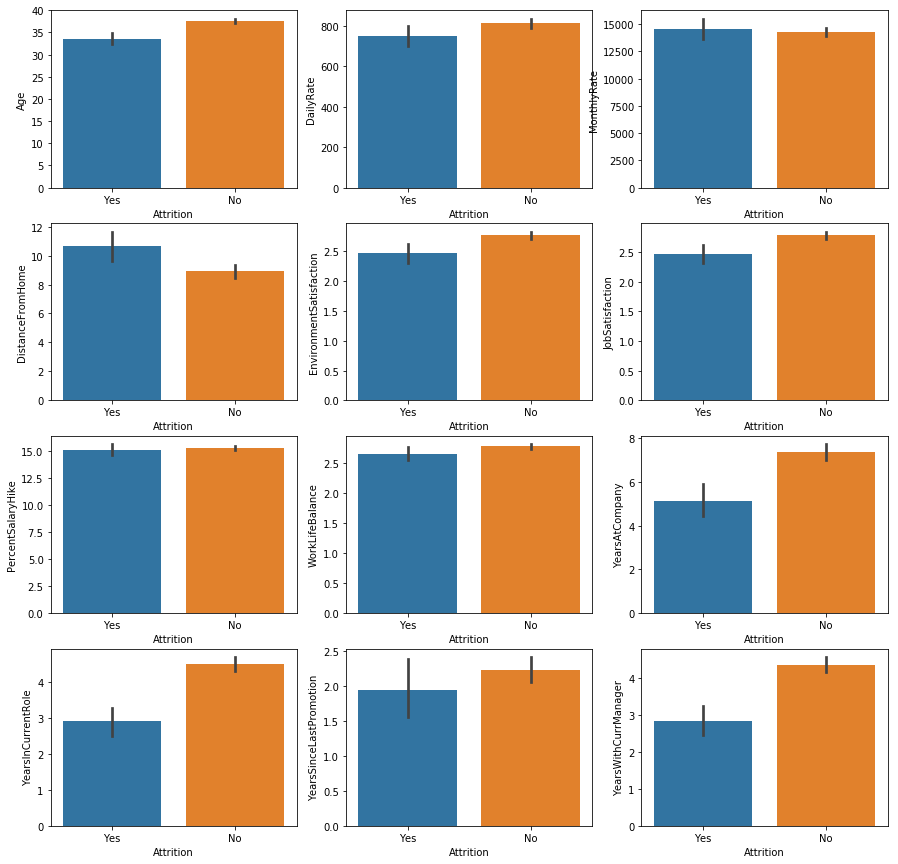

In [15]:
#Lets visualize relation of numeric paramters with respect to 'Attrition'
f,axes= plt.subplots(4,3, figsize=(15,15))
sns.barplot(x='Attrition', y ='Age', data=df,ax=axes[0,0])
sns.barplot(x='Attrition', y ='DailyRate', data=df, ax=axes[0,1])
sns.barplot(x='Attrition', y ='MonthlyRate', data=df, ax=axes[0,2])
sns.barplot(x='Attrition', y ='DistanceFromHome', data=df, ax=axes[1,0])
sns.barplot(x='Attrition', y ='EnvironmentSatisfaction', data=df, ax=axes[1,1])
sns.barplot(x='Attrition', y ='JobSatisfaction', data=df, ax=axes[1,2])
sns.barplot(x='Attrition', y ='PercentSalaryHike', data=df, ax=axes[2,0])
sns.barplot(x='Attrition', y ='WorkLifeBalance', data=df, ax=axes[2,1])
sns.barplot(x='Attrition', y ='YearsAtCompany', data=df, ax=axes[2,2])
sns.barplot(x='Attrition', y ='YearsInCurrentRole', data=df, ax=axes[3,0])
sns.barplot(x='Attrition', y ='YearsSinceLastPromotion', data=df, ax=axes[3,1])
sns.barplot(x='Attrition', y ='YearsWithCurrManager', data=df, ax=axes[3,2])

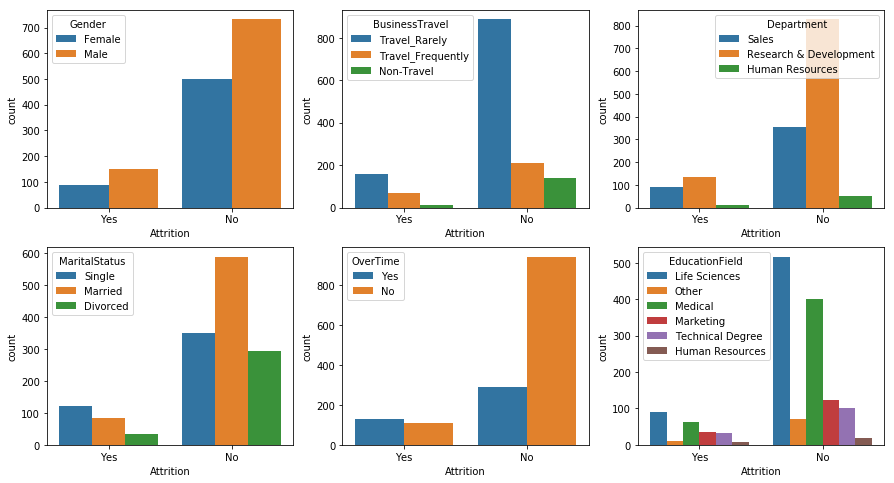

In [16]:
#Lets visualize relation of categorical variables with respect to 'Attrition'
f,axes= plt.subplots(2,3, figsize=(15,8))
sns.countplot(x='Attrition', hue ='Gender', data=df,ax=axes[0,0])
sns.countplot(x='Attrition', hue ='BusinessTravel', data=df, ax=axes[0,1])
sns.countplot(x='Attrition', hue ='Department', data=df, ax=axes[0,2])
sns.countplot(x='Attrition', hue ='MaritalStatus', data=df, ax=axes[1,0])
sns.countplot(x='Attrition', hue ='OverTime', data=df, ax=axes[1,1])
sns.countplot(x='Attrition', hue ='EducationField', data=df, ax=axes[1,2])


In [17]:
# Lets encode the target variable variable
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [18]:
#lETS CREATE A FUNCTION TO FORM A TABLE AS PER ATTRITION AND OTHER VARIABLES
def table_df(x): 
        
    feature = df.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee ', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    feature['% of Attrition in the Company'] = (feature['Attrition Number'] / 237)*100
        
    return feature

In [19]:
#Lets see the relation between attrition and businesstravel
table_df(x = 'BusinessTravel')

#WE CAN SEE CLEARLY THAT THE PERSON WHO DONT TRAVEL ARE MORE LIKELY TO STAY IN THE ORGANIZATION


,BusinessTravel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Non-Travel,150,12,8.000000,5.063291
1,Travel_Frequently,277,69,24.909747,29.113924
2,Travel_Rarely,1043,156,14.956855,65.822785


In [20]:
#Lets see the relation between attrition and department
table_df(x = 'Department')
# sales employee are more likely to leave organization  

,Department,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,63,12,19.047619,5.063291
1,Research & Development,961,133,13.839750,56.118143
2,Sales,446,92,20.627803,38.818565


In [21]:
#Lets see the relation between attrition and educationfield
table_df(x = 'EducationField')
# Ther percentage of employees who have education of HR and Technical are more likely to leave organization

,EducationField,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,27,7,25.925926,2.953586
1,Life Sciences,606,89,14.686469,37.552743
2,Marketing,159,35,22.012579,14.767932
3,Medical,464,63,13.577586,26.582278
4,Other,82,11,13.414634,4.641350
5,Technical Degree,132,32,24.242424,13.502110


In [22]:
#  Lets see the relation between Gender & Attrition 
table_df(x = 'Gender')
#Males are more likely to leave the organization

,Gender,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Female,588,87,14.795918,36.708861
1,Male,882,150,17.006803,63.291139


In [23]:
# Lets see the relation between Marital status & Attrition 
table_df(x = 'MaritalStatus')
#The persons who are single are more likely to leave the organization

,MaritalStatus,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Divorced,327,33,10.091743,13.924051
1,Married,673,84,12.481426,35.443038
2,Single,470,120,25.531915,50.632911


In [24]:
# Lets see the relation between Work Life Balance & Attrition 
table_df(x = 'WorkLifeBalance')
#here 1:'Bad', 2:'Good  3:'Better', 4:'Best'

,WorkLifeBalance,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,80,25,31.250000,10.548523
1,2,344,58,16.860465,24.472574
2,3,893,127,14.221725,53.586498
3,4,153,27,17.647059,11.392405


In [25]:
# Lets see the relation between Job Role & Attrition 
table_df(x = 'JobRole')
#Sales representative have higher chances of leaving the organization
#Labtechnicina  have also higher chances of leaving the organization

,JobRole,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Healthcare Representative,131,9,6.870229,3.797468
1,Human Resources,52,12,23.076923,5.063291
2,Laboratory Technician,259,62,23.938224,26.160338
3,Manager,102,5,4.901961,2.109705
4,Manufacturing Director,145,10,6.896552,4.219409
5,Research Director,80,2,2.500000,0.843882
6,Research Scientist,292,47,16.095890,19.831224
7,Sales Executive,326,57,17.484663,24.050633
8,Sales Representative,83,33,39.759036,13.924051


In [26]:
#Lets see relation between Job satisfaction and Attrition
table_df(x = 'JobSatisfaction')
#  here Low':1, 'Medium':2,'High':3, 'Very High':4   
# we can clearly see the higher the satisfaction more is chance of retention

,JobSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,289,66,22.837370,27.848101
1,2,280,46,16.428571,19.409283
2,3,442,73,16.515837,30.801688
3,4,459,52,11.328976,21.940928


In [27]:
#  Lets see the relation between Numbers Overtime Worked & Attrition 
table_df(x = 'OverTime')

,OverTime,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,No,1054,110,10.436433,46.413502
1,Yes,416,127,30.528846,53.586498


In [28]:
# Lets see the relation between Years with Current Manager & Attrition 
table_df(x = 'YearsWithCurrManager')

,YearsWithCurrManager,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,263,85,32.319392,35.864979
1,1,76,11,14.473684,4.641350
2,2,344,50,14.534884,21.097046
3,3,142,19,13.380282,8.016878
4,4,98,11,11.224490,4.641350
5,5,31,4,12.903226,1.687764
6,6,29,4,13.793103,1.687764
7,7,216,31,14.351852,13.080169
8,8,107,10,9.345794,4.219409
9,9,64,6,9.375000,2.531646


In [29]:
#  Lets see the relation between Years Since Last Promotion & Attrition 
table_df(x = 'YearsSinceLastPromotion')
# as expected if a employee has not received promotion since long , he is likely to leave the organization

,YearsSinceLastPromotion,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,581,110,18.932874,46.413502
1,1,357,49,13.725490,20.675105
2,2,159,27,16.981132,11.392405
3,3,52,9,17.307692,3.797468
4,4,61,5,8.196721,2.109705
5,5,45,2,4.444444,0.843882
6,6,32,6,18.750000,2.531646
7,7,76,16,21.052632,6.751055
8,8,18,0,0.000000,0.000000
9,9,17,4,23.529412,1.687764


In [30]:
# Lets see the relation between Years at Company & Attrition 
table_df(x = 'YearsAtCompany')
# The persons who have  have spent least time at organization is likely to leave 
# similary few people are likely to leave organization after gaining 1 or 2 years of experience to join new org with improved salary

,YearsAtCompany,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,44,16,36.363636,6.751055
1,1,171,59,34.502924,24.894515
2,2,127,27,21.259843,11.392405
3,3,128,20,15.625000,8.438819
4,4,110,19,17.272727,8.016878
5,5,196,21,10.714286,8.860759
6,6,76,9,11.842105,3.797468
7,7,90,11,12.222222,4.641350
8,8,80,9,11.250000,3.797468
9,9,82,8,9.756098,3.375527


In [31]:
#Lets see the relation between attrition and YearsInCurrentRole
table_df(x = 'YearsInCurrentRole')

,YearsInCurrentRole,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,244,73,29.918033,30.801688
1,1,57,11,19.298246,4.641350
2,2,372,68,18.279570,28.691983
3,3,135,16,11.851852,6.751055
4,4,104,15,14.423077,6.329114
5,5,36,1,2.777778,0.421941
6,6,37,2,5.405405,0.843882
7,7,222,31,13.963964,13.080169
8,8,89,7,7.865169,2.953586
9,9,67,6,8.955224,2.531646


In [32]:
# Lets see the relation between attrition and Distance from home
table_df(x = 'DistanceFromHome')
# the person who have work place near their home are more likely to stay in  the organization

,DistanceFromHome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,208,26,12.500000,10.970464
1,2,211,28,13.270142,11.814346
2,3,84,14,16.666667,5.907173
3,4,64,9,14.062500,3.797468
4,5,65,10,15.384615,4.219409
5,6,59,7,11.864407,2.953586
6,7,84,11,13.095238,4.641350
7,8,80,10,12.500000,4.219409
8,9,85,18,21.176471,7.594937
9,10,86,11,12.790698,4.641350


In [33]:
# Lets see the relation between Monthly Income & Attrition 
table_df(x = "MonthlyIncome")

,MonthlyIncome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1009,1,1,100.0,0.421941
1,1051,1,0,0.0,0.000000
2,1052,1,0,0.0,0.000000
3,1081,1,1,100.0,0.421941
4,1091,1,1,100.0,0.421941
5,1102,1,1,100.0,0.421941
6,1118,1,1,100.0,0.421941
7,1129,1,0,0.0,0.000000
8,1200,1,0,0.0,0.000000
9,1223,1,0,0.0,0.000000


In [34]:
# Lets see the relation between attrition and age
table_df(x='Age')

,Age,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,18,8,4,50.000000,1.687764
1,19,9,6,66.666667,2.531646
2,20,11,6,54.545455,2.531646
3,21,13,6,46.153846,2.531646
4,22,16,5,31.250000,2.109705
5,23,14,4,28.571429,1.687764
6,24,26,7,26.923077,2.953586
7,25,26,6,23.076923,2.531646
8,26,39,12,30.769231,5.063291
9,27,48,3,6.250000,1.265823


In [35]:
#Lets check the unique values in each column
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [36]:
# Drop the features which have zero variance or unique for each employee 
df.drop(['Over18','StandardHours','EmployeeCount','EmployeeNumber'], axis = 1,inplace=True)

In [37]:
#Lets confirm the drop of above columns
df.shape

(1470, 31)

In [38]:
#Lets convert the nominal variables into dummy variables
businesstravel = pd.get_dummies(df['BusinessTravel'],drop_first=True,prefix='Btravel')
department = pd.get_dummies(df['Department'],drop_first=True,prefix='department')
EduField =pd.get_dummies(df['EducationField'],drop_first=True,prefix='EduFie')
Gender = pd.get_dummies(df['Gender'],drop_first=True,prefix='Gender')
Married =  pd.get_dummies(df['MaritalStatus'],drop_first=True,prefix='MaritalS')
Jobrole  = pd.get_dummies(df['JobRole'],drop_first=True,prefix='year')
overtime = pd.get_dummies(df['OverTime'],drop_first=True,prefix='Overtime')

In [39]:
# As new dummy variables have been created for mentioned variables we dont need them
df.drop(['BusinessTravel','Department','EducationField','Gender','MaritalStatus','JobRole','OverTime'],axis=1,inplace=True)

In [40]:
#Lets create new dataframe
dfx= pd.concat([df,businesstravel,department,EduField,Gender,Married,Jobrole,overtime],axis=1)


In [41]:
#Lets check the shape
dfx.shape

(1470, 45)

In [42]:
#Lets check the 5 rows
dfx.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,MaritalS_Single,year_Human Resources,year_Laboratory Technician,year_Manager,year_Manufacturing Director,year_Research Director,year_Research Scientist,year_Sales Executive,year_Sales Representative,Overtime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,1,0,0,0,0,0,0,1,0,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,0,0,0,1,0,0,0
2,37,1,1373,2,2,4,92,2,1,3,...,1,0,1,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,0,0,0,1,0,0,1
4,27,0,591,2,1,1,40,3,1,2,...,0,0,1,0,0,0,0,0,0,0


In [43]:
# Let us seperate the features and Target
x=dfx.drop(['Attrition'],axis=1)    
y=dfx[['Attrition']]

In [44]:
#lets see first 5 rows of x1
x.head()
# x now contains only features

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,MaritalS_Single,year_Human Resources,year_Laboratory Technician,year_Manager,year_Manufacturing Director,year_Research Director,year_Research Scientist,year_Sales Executive,year_Sales Representative,Overtime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,1,0,0,0,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,0,0,1,0,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,1,0,0,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,1,0,0,0,0,0,0,0


In [45]:
#Lets check first five rows of target
y.head()
# y now contains only target variable

,Attrition
0,1
1,0
2,1
3,0
4,0


In [46]:
#Lets check skewness 
x.skew()
# there are few variables have skewness not in acceptable range those are postively skewed

Age                                  0.413286
DailyRate                           -0.003519
DistanceFromHome                     0.958118
Education                           -0.289681
EnvironmentSatisfaction             -0.321654
HourlyRate                          -0.032311
JobInvolvement                      -0.498419
JobLevel                             1.025401
JobSatisfaction                     -0.329672
MonthlyIncome                        1.369817
MonthlyRate                          0.018578
NumCompaniesWorked                   1.026471
PercentSalaryHike                    0.821128
PerformanceRating                    1.921883
RelationshipSatisfaction            -0.302828
StockOptionLevel                     0.968980
TotalWorkingYears                    1.117172
TrainingTimesLastYear                0.553124
WorkLifeBalance                     -0.552480
YearsAtCompany                       1.764529
YearsInCurrentRole                   0.917363
YearsSinceLastPromotion           

In [47]:
# Let us reduce the  positive Skewness
for col in x.columns:                                      
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [48]:
#lets again check the skewness
x.skew()
# although skewness has come down  in few variables but in few variables it was too high that it does  not come below the required level

Age                                  0.413286
DailyRate                           -0.003519
DistanceFromHome                    -0.029121
Education                           -0.289681
EnvironmentSatisfaction             -0.321654
HourlyRate                          -0.032311
JobInvolvement                      -0.498419
JobLevel                             0.448133
JobSatisfaction                     -0.329672
MonthlyIncome                        0.286448
MonthlyRate                          0.018578
NumCompaniesWorked                   0.092896
PercentSalaryHike                    0.513543
PerformanceRating                    1.921883
RelationshipSatisfaction            -0.302828
StockOptionLevel                     0.271963
TotalWorkingYears                   -0.622175
TrainingTimesLastYear               -1.075852
WorkLifeBalance                     -0.552480
YearsAtCompany                      -0.207708
YearsInCurrentRole                  -0.383498
YearsSinceLastPromotion           

In [49]:
#Let us reduce negative skewness
for col in x.columns:                                      
    if x.skew().loc[col]<-0.55:
        x[col]=np.power(x[col],2)

In [50]:
#Lets check the skewness again
x.skew()

Age                                  0.413286
DailyRate                           -0.003519
DistanceFromHome                    -0.029121
Education                           -0.289681
EnvironmentSatisfaction             -0.321654
HourlyRate                          -0.032311
JobInvolvement                      -0.498419
JobLevel                             0.448133
JobSatisfaction                     -0.329672
MonthlyIncome                        0.286448
MonthlyRate                          0.018578
NumCompaniesWorked                   0.092896
PercentSalaryHike                    0.513543
PerformanceRating                    1.921883
RelationshipSatisfaction            -0.302828
StockOptionLevel                     0.271963
TotalWorkingYears                    0.322355
TrainingTimesLastYear                0.492375
WorkLifeBalance                      0.301318
YearsAtCompany                      -0.207708
YearsInCurrentRole                  -0.383498
YearsSinceLastPromotion           

In [51]:
#As it is a classification problem lets import require metrics from  libraries
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score,roc_curve,confusion_matrix

In [52]:
#Lets see which of the algorithims performs well on the given data
# A good way to check their performance is cross validation
#Lets import the algorithims/models to be evaluated  AND OTHER REQUIRED LIBRARIES
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [53]:
# Lets import standard scaler as distance based algorithim require data to be in same scale
from sklearn.preprocessing import StandardScaler
# Lets create a list of models to be evaluated ALONG with pipeline
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('LDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('DT', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier(random_state=5))])))
pipelines.append(('NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))




In [54]:
#Let us check which model will perform well on the given data on the basis of mean crossval score and its std dev
results = []
names = []
for name, model in pipelines: 
    kfold = KFold(n_splits=10, random_state=1) 
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='accuracy') 
    results.append(cv_results.mean()) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.883673 (0.029878)
LDA: 0.876871 (0.029252)
KNN: 0.850340 (0.022766)
DT: 0.782313 (0.023368)
NB: 0.725170 (0.034979)
SVM: 0.871429 (0.025535)


In [55]:
Comparisonc = pd.DataFrame({'ModelName':names,'cross_val_accuracy': results})
Comparisonc.sort_values(by='cross_val_accuracy', ascending=False)

,ModelName,cross_val_accuracy
0,LR,0.883673
1,LDA,0.876871
5,SVM,0.871429
2,KNN,0.850340
3,DT,0.782313
4,NB,0.725170


In [56]:
#lets  see if any of the three chosen ensemble technique  with default paramters can give improved accuracy
# by default they work on decision  tree so scaling is not required
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
ensemble = [('RF', RandomForestClassifier(random_state=5)),('ADC',AdaBoostClassifier(random_state=5)),('GBC',GradientBoostingClassifier(random_state=5))]
results1 = []
names1 = []
for name, model in ensemble: 
    kfold = KFold(n_splits=10, random_state=1) 
    cv_results1 = cross_val_score(model, x, y, cv=kfold, scoring='accuracy') 
    results1.append(cv_results1.mean()) 
    names1.append(name) 
    msg1 = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg1)                                              


RF: 0.852381 (0.023575)
ADC: 0.876190 (0.021684)
GBC: 0.863265 (0.027117)


In [57]:
Comparisonn = pd.DataFrame({'ModelName':names1,'cross_val_accuracy': results1})
Comparisonn.sort_values(by='cross_val_accuracy', ascending=False)

,ModelName,cross_val_accuracy
1,ADC,0.876190
2,GBC,0.863265
0,RF,0.852381


In [58]:
finalcomparison = pd.concat([Comparisonc,Comparisonn])
finalcomparison.sort_values(by='cross_val_accuracy',ascending =False)

,ModelName,cross_val_accuracy
0,LR,0.883673
1,LDA,0.876871
1,ADC,0.876190
5,SVM,0.871429
2,GBC,0.863265
0,RF,0.852381
2,KNN,0.850340
3,DT,0.782313
4,NB,0.725170


In [59]:
# We can see that Logistics regression, LDA, ,ADC, SVM and GBC are very close in performance
#  Lets select Logistics regression for implementation as its giving best cross val score with default paramters

#Lets try to tune paramters of logistics regression to find better cross val score

In [60]:
#Lets try to check if  cross val performance of Logistics Regression can be increased by changing parameters
from sklearn.model_selection import GridSearchCV
kfoldx = KFold(n_splits=10, random_state=1) 
scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)
c_values =  [0.001,0.01,0.1, 0.2, 0.3, 0.4, 0.5, 1,2,3,4,5]
max_iter = [10,20,50,100,200,300,500]
tol=[0.0001,0.01,0.1,0.5,1,2,5,10]
param_grid = dict(C=c_values,max_iter=max_iter,tol=tol)
tol=[0.0001,0.01,0.1,0.5,1]
model = LogisticRegression()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfoldx,n_jobs=-1)
grid_result = grid.fit(rescaledX, y)

In [61]:
#Lets check best cross val score
grid_result.best_score_
# cross val score has been improved a bit from 0.883673 to 0.8857142857142857

0.8857142857142857

In [62]:
#Lets check best parameters
grid_result.best_params_ 

{'C': 0.2, 'max_iter': 10, 'tol': 1}

In [63]:
# Lets import the library to split train and test data
from sklearn.model_selection import train_test_split

In [64]:
#Lets find out the best random state for selected Logistics regression for best paramters

max_accuracy=0
log= LogisticRegression(C=0.2,max_iter=10,tol=1)
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=i)
    ss = StandardScaler()
    X_train= ss.fit_transform(X_train)
    X_test= ss.transform(X_test)
    log.fit(X_train,y_train)
    ypreds=log.predict(X_test)
    accuracy=accuracy_score(y_test, ypreds)
    print('At random state ', i, 'the value of accuracy is ', accuracy)
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        finalstate=i
print()
print()
print('max accuracy is', max_accuracy,'at random state' , finalstate)

At random state  1 the value of accuracy is  0.8605442176870748
At random state  2 the value of accuracy is  0.8775510204081632
At random state  3 the value of accuracy is  0.8877551020408163
At random state  4 the value of accuracy is  0.9149659863945578
At random state  5 the value of accuracy is  0.891156462585034
At random state  6 the value of accuracy is  0.8741496598639455
At random state  7 the value of accuracy is  0.8775510204081632
At random state  8 the value of accuracy is  0.9013605442176871
At random state  9 the value of accuracy is  0.8979591836734694
At random state  10 the value of accuracy is  0.8843537414965986
At random state  11 the value of accuracy is  0.891156462585034
At random state  12 the value of accuracy is  0.8843537414965986
At random state  13 the value of accuracy is  0.8809523809523809
At random state  14 the value of accuracy is  0.8945578231292517
At random state  15 the value of accuracy is  0.8877551020408163
At random state  16 the value of acc

In [65]:
#Lets build the model using the best random state
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size =0.2, random_state = 26)
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)
Logr= LogisticRegression(C=0.2,max_iter=10,tol=1)
Logr.fit(X_train,y_train)
ypred=Logr.predict(X_test)
accuracy= accuracy_score(y_test,ypred)
print('accuracy is', accuracy)

accuracy is 0.9285714285714286


In [66]:
#Lets once again verify its  cross val  accuracy score
kfoldx = KFold(n_splits=10, random_state=1)
cross_val_score(LogisticRegression(C=0.2,max_iter=10,tol=1),rescaledX,y,cv=kfoldx,scoring="accuracy").mean()

0.8857142857142856

In [67]:
# Lets save the predicted result to a csv file
dfpr = pd.DataFrame(ypred,columns=['Predicted_values'])
dfpr.to_csv('LR_HR_prediction.csv')

In [68]:
#Lets print the confusion matrix
print('confusion matrix = ',confusion_matrix(y_test,ypred))

confusion matrix =  [[255   6]
 [ 15  18]]


In [69]:
#Lets print the classification report
print('classification report = ',classification_report(y_test,ypred))

classification report =                precision    recall  f1-score   support

           0       0.94      0.98      0.96       261
           1       0.75      0.55      0.63        33

   micro avg       0.93      0.93      0.93       294
   macro avg       0.85      0.76      0.80       294
weighted avg       0.92      0.93      0.92       294



In [70]:
#Lets try to check the performance using PCA
scal=StandardScaler()
scaledx=scal.fit_transform(x)
from sklearn.decomposition import PCA
pca = PCA()
x_pca=pca.fit_transform(scaledx)

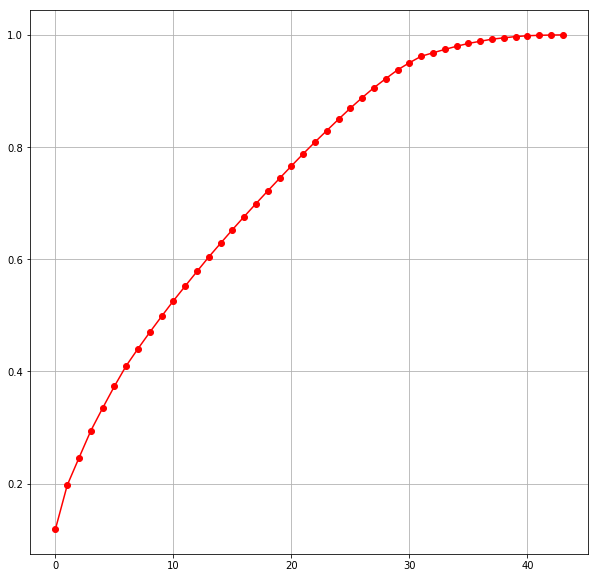

In [71]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')
plt.grid()

In [72]:
#Lets select 30 principal components
pca_new = PCA(n_components=30)
x_new=pca_new.fit_transform(scaledx)

In [73]:
#Lets see what will be the cross val accuracy using pca
kfoldxn = KFold(n_splits=10, random_state=1)
cross_val_score(LogisticRegression(C=0.2,max_iter=10,tol=1),x_new,y,cv=kfoldxn,scoring="accuracy").mean()

0.8789115646258503

In [74]:
compPCA=pd.DataFrame({'Approach':['WithoutPCA','WithPCA'],'crossval_accuracy':[0.8857,0.8789]})
compPCA

,Approach,crossval_accuracy
0,WithoutPCA,0.8857
1,WithPCA,0.8789


We can see that without pca we are getting better cross val accuracy 
so our final model will be the one without PCA i.e 'Logr'

In [75]:
# Lets dump our final model into pkl file
from sklearn.externals import joblib
joblib.dump(Logr,'LR_HR.pkl')

['LR_HR.pkl']